In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline

nltk.download("vader_lexicon")

sia = SentimentIntensityAnalyzer()

# load csv file
df = pd.read_csv("Sentiment Analysis on DLSU-D Tuition Fee Increase.csv")

# ignore the first two columns ("Timestamp" and "Name")
question_columns = list(df.columns.values[2:12])

# replace the column names with a shorter one for convenience
question_num = 1
for column in df:
    if column == "Timestamp" or column == "Name":
        pass
    else:
        df.rename(columns={column:f"Q{question_num}"}, inplace=True)
        if question_num > 9:
            break
        else:
            question_num += 1

def get_question_info(df, question_num=1):
    """Compute the polarity and compound scores of the answers."""
    # drop na values
    vals_to_drop = ["", "None", "none", "NaN", "N/a", "-"]
    for item in vals_to_drop:
        df.loc[df[f"Q{question_num}"] == item] = pd.NA
    df.dropna(inplace=True)

    question_df = df[[f"Q{question_num}", f"Q{question_num}_label"]].copy()
    question_df["polarity_scores"] = question_df.iloc[:,0].apply(lambda answer: sia.polarity_scores(answer))
    question_df["neg"] = question_df["polarity_scores"].apply(lambda score_dict: score_dict["neg"])
    question_df["neu"] = question_df["polarity_scores"].apply(lambda score_dict: score_dict["neu"])
    question_df["pos"] = question_df["polarity_scores"].apply(lambda score_dict: score_dict["pos"])
    question_df["compound"] = question_df["polarity_scores"].apply(lambda score_dict: score_dict["compound"])
    question_df["compound_score"] = question_df["compound"].apply(lambda score: "pos" if score > 0 else ("neu" if score == 0 else "neg"))

    return question_df

def process_dataframe_metrics(df, question_num=1):
    print("Accuracy Score:", accuracy_score(df[f"Q{question_num}_label"], df["compound_score"]))
    print("Classification Report:\n", classification_report(df[f"Q{question_num}_label"], df["compound_score"], zero_division=0))
    print("Confusion Matrix:\n", confusion_matrix(df[f"Q{question_num}_label"], df["compound_score"]))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Q1

In [ ]:
QUESTION = 1
q1_df = get_question_info(df, QUESTION)
process_dataframe_metrics(q1_df, QUESTION)
print("\n", question_columns[QUESTION - 1])
q1_df

Accuracy Score: 0.8846153846153846
Classification Report:
               precision    recall  f1-score   support

         neg       0.92      0.63      0.75        19
         neu       1.00      0.75      0.86         4
         pos       0.87      0.98      0.92        55

    accuracy                           0.88        78
   macro avg       0.93      0.79      0.84        78
weighted avg       0.89      0.88      0.88        78

Confusion Matrix:
 [[12  0  7]
 [ 0  3  1]
 [ 1  0 54]]

 Are you satisfied with your course? Why do you feel like it?


,Q1,Q1_label,polarity_scores,neg,neu,pos,compound,compound_score
0,"Yes, because it helps me peak my interests in ...",pos,"{'neg': 0.0, 'neu': 0.622, 'pos': 0.378, 'comp...",0.000,0.622,0.378,0.7430,pos
1,Yes because I am interested at my course.,pos,"{'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'comp...",0.000,0.481,0.519,0.6597,pos
2,Yes! Because I love what I do.,pos,"{'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'comp...",0.000,0.294,0.706,0.8016,pos
3,"I feel that it is lacking, with the increase o...",neg,"{'neg': 0.129, 'neu': 0.827, 'pos': 0.044, 'co...",0.129,0.827,0.044,-0.5267,neg
4,"Yes, because it is my passion and I am curious...",pos,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.000,0.556,0.444,0.7906,pos
...,...,...,...,...,...,...,...,...
80,Not really,neu,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neu
81,"Yes, I am satisfied with my course, because i ...",pos,"{'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'comp...",0.000,0.564,0.436,0.8176,pos
82,YES AND IT IS A GOOD FEELING TO PURSUE MY DREA...,pos,"{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...",0.000,0.435,0.565,0.7964,pos
83,No I am not satisfied with my course cause the...,neg,"{'neg': 0.21, 'neu': 0.79, 'pos': 0.0, 'compou...",0.210,0.790,0.000,-0.5472,neg


# Q2

In [ ]:
QUESTION = 2
q2_df = get_question_info(df, QUESTION)
process_dataframe_metrics(q2_df, QUESTION)
print("\n", question_columns[QUESTION - 1])
q2_df

Accuracy Score: 0.8461538461538461
Classification Report:
               precision    recall  f1-score   support

         neg       0.60      0.55      0.57        11
         neu       1.00      0.57      0.73         7
         pos       0.88      0.93      0.90        60

    accuracy                           0.85        78
   macro avg       0.83      0.68      0.73        78
weighted avg       0.85      0.85      0.84        78

Confusion Matrix:
 [[ 6  0  5]
 [ 0  4  3]
 [ 4  0 56]]

 Do you think the course that you chose is worth it? Why?


,Q2,Q2_label,polarity_scores,neg,neu,pos,compound,compound_score
0,"Yes, because it would enhance and let me learn...",pos,"{'neg': 0.078, 'neu': 0.706, 'pos': 0.216, 'co...",0.078,0.706,0.216,0.5423,pos
1,Yes because Comp Sci related jobs is highly fa...,pos,"{'neg': 0.0, 'neu': 0.621, 'pos': 0.379, 'comp...",0.000,0.621,0.379,0.7264,pos
2,Yes. I think the course I chose is worth it si...,pos,"{'neg': 0.068, 'neu': 0.724, 'pos': 0.208, 'co...",0.068,0.724,0.208,0.4767,pos
3,Not so much if I am being honest. Like I have ...,neg,"{'neg': 0.14, 'neu': 0.726, 'pos': 0.133, 'com...",0.140,0.726,0.133,0.1536,pos
4,"Yes, since I know that I will be happy once I ...",pos,"{'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'comp...",0.000,0.615,0.385,0.9153,pos
...,...,...,...,...,...,...,...,...
80,Yes malaki daw sahod,pos,"{'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'comp...",0.000,0.526,0.474,0.4019,pos
81,Yes it is worth it becasue i think there is no...,pos,"{'neg': 0.117, 'neu': 0.638, 'pos': 0.245, 'co...",0.117,0.638,0.245,0.3400,pos
82,YES BECAUSE I CAN LEANR WHAT I WANT WITHOUT OT...,pos,"{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'comp...",0.000,0.543,0.457,0.5978,pos
83,No I don't think it's worth it because I feel ...,neg,"{'neg': 0.363, 'neu': 0.637, 'pos': 0.0, 'comp...",0.363,0.637,0.000,-0.7626,neg


# Q3

In [ ]:
QUESTION = 3
q3_df = get_question_info(df, QUESTION)
process_dataframe_metrics(q3_df, QUESTION)
print("\n", question_columns[QUESTION - 1])
q3_df

Accuracy Score: 0.8589743589743589
Classification Report:
               precision    recall  f1-score   support

         neg       0.94      0.86      0.90        56
         neu       1.00      0.78      0.88         9
         pos       0.60      0.92      0.73        13

    accuracy                           0.86        78
   macro avg       0.85      0.85      0.83        78
weighted avg       0.89      0.86      0.87        78

Confusion Matrix:
 [[48  0  8]
 [ 2  7  0]
 [ 1  0 12]]

 Is the tuition fee increase justifiable? Give insight on how it affects you.


,Q3,Q3_label,polarity_scores,neg,neu,pos,compound,compound_score
0,It somehow affects me and my families budgetin...,neu,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neu
1,No because there is no such thing to increase ...,neg,"{'neg': 0.299, 'neu': 0.544, 'pos': 0.156, 'co...",0.299,0.544,0.156,-0.2732,neg
2,"No, I don't think the tuition fee is fair. Giv...",pos,"{'neg': 0.06, 'neu': 0.877, 'pos': 0.063, 'com...",0.060,0.877,0.063,0.0258,pos
3,"No, it is not. It is the worst I have experien...",neg,"{'neg': 0.152, 'neu': 0.767, 'pos': 0.081, 'co...",0.152,0.767,0.081,-0.6202,neg
4,"Not really, since it feels like the facilities...",neg,"{'neg': 0.212, 'neu': 0.692, 'pos': 0.096, 'co...",0.212,0.692,0.096,-0.4599,neg
...,...,...,...,...,...,...,...,...
80,No 80 amp tas ung mga Bangko papanget tas airc...,neg,"{'neg': 0.155, 'neu': 0.845, 'pos': 0.0, 'comp...",0.155,0.845,0.000,-0.2960,neg
81,No it is not justifiable because in my opinion...,neg,"{'neg': 0.085, 'neu': 0.656, 'pos': 0.259, 'co...",0.085,0.656,0.259,0.5423,pos
82,NO BECAUSE IT MAYBE BECOME TOO EXPENSIVE TO MA...,neg,"{'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'comp...",0.216,0.784,0.000,-0.2960,neg
83,No. I don't want to elaborate any further.,neg,"{'neg': 0.406, 'neu': 0.594, 'pos': 0.0, 'comp...",0.406,0.594,0.000,-0.3447,neg


# Q4

In [ ]:
QUESTION = 4
q4_df = get_question_info(df, QUESTION)
process_dataframe_metrics(q4_df, QUESTION)
print("\n", question_columns[QUESTION - 1])
q4_df

Accuracy Score: 0.7662337662337663
Classification Report:
               precision    recall  f1-score   support

         neg       0.91      0.64      0.75        33
         neu       0.67      1.00      0.80        12
         pos       0.72      0.81      0.76        32

    accuracy                           0.77        77
   macro avg       0.77      0.82      0.77        77
weighted avg       0.80      0.77      0.76        77

Confusion Matrix:
 [[21  2 10]
 [ 0 12  0]
 [ 2  4 26]]

 Do you think that they do this to catch up with other institutions? If so, why do you think that is?


,Q4,Q4_label,polarity_scores,neg,neu,pos,compound,compound_score
0,"I do not entirely know, how people run REDACTED i...",neg,"{'neg': 0.07, 'neu': 0.93, 'pos': 0.0, 'compou...",0.070,0.930,0.000,-0.4585,neg
1,Yes and it is not reasonable to catch up with ...,pos,"{'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'comp...",0.000,0.863,0.137,0.4019,pos
2,I think it is possible to catch up with other ...,neg,"{'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compou...",0.000,0.890,0.110,0.3818,pos
3,I do not know why they do this. This might be ...,neg,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neu
4,"Yes, because they are investing the future. My...",pos,"{'neg': 0.0, 'neu': 0.831, 'pos': 0.169, 'comp...",0.000,0.831,0.169,0.6486,pos
...,...,...,...,...,...,...,...,...
80,Oo nmn basahin nila,pos,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neu
81,Maybe because there are many academic institut...,neu,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neu
82,MAYBE BECAUSE THEY HAVE TO COMPETE WITH OUTHER...,pos,"{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compou...",0.000,0.870,0.130,0.3400,pos
83,"I don't think so, because I think all other in...",neg,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neu


# Q5

In [ ]:
QUESTION = 5
q5_df = get_question_info(df, QUESTION)
process_dataframe_metrics(q5_df, QUESTION)
print("\n", question_columns[QUESTION - 1])
q5_df

Accuracy Score: 0.8051948051948052
Classification Report:
               precision    recall  f1-score   support

         neg       0.94      0.73      0.83        45
         neu       1.00      0.67      0.80         3
         pos       0.68      0.93      0.78        29

    accuracy                           0.81        77
   macro avg       0.87      0.78      0.80        77
weighted avg       0.84      0.81      0.81        77

Confusion Matrix:
 [[33  0 12]
 [ 0  2  1]
 [ 2  0 27]]

 Are you satisfied with the materials and equipment that the university provides you? Elaborate and provide feedback, if able.


,Q5,Q5_label,polarity_scores,neg,neu,pos,compound,compound_score
0,"Yes, because i do think all we need is in the ...",pos,"{'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'comp...",0.000,0.944,0.056,0.2144,pos
1,I am not satisfied because the equipment that ...,neg,"{'neg': 0.076, 'neu': 0.751, 'pos': 0.173, 'co...",0.076,0.751,0.173,0.4530,pos
2,"No, I am not satisfied with the materials and ...",pos,"{'neg': 0.249, 'neu': 0.751, 'pos': 0.0, 'comp...",0.249,0.751,0.000,-0.7865,neg
3,No. No I am not satisfied.,neg,"{'neg': 0.771, 'neu': 0.229, 'pos': 0.0, 'comp...",0.771,0.229,0.000,-0.6939,neg
4,"No, because it has gotten less and worse overt...",neg,"{'neg': 0.418, 'neu': 0.582, 'pos': 0.0, 'comp...",0.418,0.582,0.000,-0.6151,neg
...,...,...,...,...,...,...,...,...
80,Hndi kakasabi ko lng po,neg,"{'neg': 0.474, 'neu': 0.526, 'pos': 0.0, 'comp...",0.474,0.526,0.000,-0.5574,neg
81,I am satsfied with the equipment they provide....,pos,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",0.000,0.769,0.231,0.7184,pos
82,YES I AM SATISFIED WITH EQUIPMENT AS IT WORKS ...,pos,"{'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'comp...",0.000,0.744,0.256,0.6705,pos
83,Slightly satisfied because they have good comp...,pos,"{'neg': 0.07, 'neu': 0.801, 'pos': 0.129, 'com...",0.070,0.801,0.129,0.1787,pos


# Q6

In [ ]:
QUESTION = 6
q6_df = get_question_info(df, QUESTION)
process_dataframe_metrics(q6_df, QUESTION)
print("\n", question_columns[QUESTION - 1])
q6_df

Accuracy Score: 0.7662337662337663
Classification Report:
               precision    recall  f1-score   support

         neg       0.86      0.69      0.77        26
         neu       0.29      0.83      0.43         6
         pos       0.92      0.80      0.86        45

    accuracy                           0.77        77
   macro avg       0.69      0.78      0.69        77
weighted avg       0.85      0.77      0.79        77

Confusion Matrix:
 [[18  6  2]
 [ 0  5  1]
 [ 3  6 36]]

 Is the tuition fee increase manageable? How do you think to manage it?


,Q6,Q6_label,polarity_scores,neg,neu,pos,compound,compound_score
0,"Yes for us, i do think we can manage it becaus...",pos,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.000,0.899,0.101,0.4019,pos
1,Depends for some people but for me yes it is m...,pos,"{'neg': 0.152, 'neu': 0.693, 'pos': 0.155, 'co...",0.152,0.693,0.155,0.0387,pos
2,It can be manageable if the university decides...,neg,"{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...",0.000,0.839,0.161,0.6326,pos
3,It is almost not. It breaks my heart to see my...,neg,"{'neg': 0.186, 'neu': 0.784, 'pos': 0.03, 'com...",0.186,0.784,0.030,-0.8658,neg
4,"Yes, I have my parents to thank for that since...",pos,"{'neg': 0.033, 'neu': 0.643, 'pos': 0.324, 'co...",0.033,0.643,0.324,0.9217,pos
...,...,...,...,...,...,...,...,...
80,"Hnid kaaya aya mahal ah, magaral nlng ng mabut...",neg,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neu
81,Yes i think its manageable because we are fina...,pos,"{'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'comp...",0.000,0.654,0.346,0.6486,pos
82,ITS MANAGABLE CAUSE MY PARENTS HAVE DECENT JOB...,pos,"{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.000,0.746,0.254,0.6249,pos
83,If you're from a rich family then probably yes...,pos,"{'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compou...",0.000,0.730,0.270,0.7506,pos


# Q7

In [ ]:
QUESTION = 7
q7_df = get_question_info(df, QUESTION)
process_dataframe_metrics(q7_df, QUESTION)
print("\n", question_columns[QUESTION - 1])
q7_df

Accuracy Score: 0.7662337662337663
Classification Report:
               precision    recall  f1-score   support

         neg       0.77      0.62      0.69        16
         neu       0.61      0.85      0.71        20
         pos       0.89      0.78      0.83        41

    accuracy                           0.77        77
   macro avg       0.76      0.75      0.74        77
weighted avg       0.79      0.77      0.77        77

Confusion Matrix:
 [[10  5  1]
 [ 0 17  3]
 [ 3  6 32]]

 How will you plan for future tuition fee increases?


,Q7,Q7_label,polarity_scores,neg,neu,pos,compound,compound_score
0,I do not know honestly,neg,"{'neg': 0.453, 'neu': 0.547, 'pos': 0.0, 'comp...",0.453,0.547,0.000,-0.3570,neg
1,Save up and smartly manage finances.,pos,"{'neg': 0.0, 'neu': 0.412, 'pos': 0.588, 'comp...",0.000,0.412,0.588,0.6908,pos
2,If no significant increase in the quality of o...,neg,"{'neg': 0.198, 'neu': 0.646, 'pos': 0.156, 'co...",0.198,0.646,0.156,-0.2732,neg
3,I might just switch schools or find a job. If ...,pos,"{'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'comp...",0.000,0.873,0.127,0.4404,pos
4,I guess by watching my spendings and making su...,pos,"{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'comp...",0.000,0.672,0.328,0.8316,pos
...,...,...,...,...,...,...,...,...
80,Ewan ko sila nagbabayad d ako,neg,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neu
81,Most likely save more money,pos,"{'neg': 0.0, 'neu': 0.535, 'pos': 0.465, 'comp...",0.000,0.535,0.465,0.5390,pos
82,SAVE MONEY AND RESERVE SPOTS,pos,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.000,0.556,0.444,0.4939,pos
83,Always prepare for it and expect it to always ...,neu,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neu


# Q8

In [ ]:
QUESTION = 8
q8_df = get_question_info(df, QUESTION)
process_dataframe_metrics(q8_df, QUESTION)
print("\n", question_columns[QUESTION - 1])
q8_df

Accuracy Score: 0.7733333333333333
Classification Report:
               precision    recall  f1-score   support

         neg       0.43      0.30      0.35        10
         neu       0.79      1.00      0.88        46
         pos       0.90      0.47      0.62        19

    accuracy                           0.77        75
   macro avg       0.71      0.59      0.62        75
weighted avg       0.77      0.77      0.75        75

Confusion Matrix:
 [[ 3  6  1]
 [ 0 46  0]
 [ 4  6  9]]

 What additional expenses should you expect to pay for besides the tuition fee?


,Q8,Q8_label,polarity_scores,neg,neu,pos,compound,compound_score
0,I only expect to pay for our food,pos,"{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'comp...",0.189,0.811,0.000,-0.1027,neg
1,Uniform,neu,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neu
2,"The food within the university, materials for ...",neg,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neu
3,I am thinking about the transportation fee. Al...,neu,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neu
4,Laboratory fees.,neu,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neu
...,...,...,...,...,...,...,...,...
80,Wala mayaman lasalle kaya na nila sumagot sa g...,neg,"{'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'comp...",0.113,0.887,0.000,-0.1027,neg
81,Better supplies and equipment to suit better e...,pos,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",0.000,0.508,0.492,0.7003,pos
82,MISCELANEOUS FEES THAT MAY BE IMPORTANT TO OTH...,pos,"{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...",0.000,0.816,0.184,0.2023,pos
83,"Uniform, I don't know why do I need to pay it ...",neg,"{'neg': 0.157, 'neu': 0.843, 'pos': 0.0, 'comp...",0.157,0.843,0.000,-0.4767,neg


# Q9

In [ ]:
QUESTION = 9
q9_df = get_question_info(df, QUESTION)
process_dataframe_metrics(q9_df, QUESTION)
print("\n", question_columns[QUESTION - 1])
q9_df

Accuracy Score: 0.8591549295774648
Classification Report:
               precision    recall  f1-score   support

         neg       0.63      0.92      0.75        13
         neu       0.91      0.97      0.94        33
         pos       1.00      0.68      0.81        25

    accuracy                           0.86        71
   macro avg       0.85      0.86      0.83        71
weighted avg       0.89      0.86      0.86        71

Confusion Matrix:
 [[12  1  0]
 [ 1 32  0]
 [ 6  2 17]]

 What external factors do you think affects how you manage the tuition fee?


,Q9,Q9_label,polarity_scores,neg,neu,pos,compound,compound_score
0,Idk,neg,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.000,0.000,0.000,-0.1027,neg
1,The price increase of the items in our country.,pos,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...",0.000,0.777,0.223,0.3182,pos
2,Inflation is one of the factors that causes th...,neu,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neu
3,"Other daily necessities like food, bills, and ...",pos,"{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'comp...",0.000,0.776,0.224,0.7783,pos
4,My hobbies as well as my personal enjoyment to...,pos,"{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'comp...",0.000,0.659,0.341,0.6908,pos
...,...,...,...,...,...,...,...,...
80,Idk,neg,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.000,0.000,0.000,-0.1027,neg
81,I think government and outside peer pressure.,pos,"{'neg': 0.306, 'neu': 0.694, 'pos': 0.0, 'comp...",0.306,0.694,0.000,-0.2960,neg
82,INFLATION,neu,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neu
83,The quality of the courses and that the instit...,neu,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neu


# Q10

In [ ]:
QUESTION = 10
q10_df = get_question_info(df, QUESTION)
process_dataframe_metrics(q10_df, QUESTION)
print("\n", question_columns[QUESTION - 1])
q10_df

Accuracy Score: 0.8571428571428571
Classification Report:
               precision    recall  f1-score   support

         neg       0.55      0.75      0.63         8
         neu       0.86      1.00      0.92        18
         pos       0.95      0.82      0.88        44

    accuracy                           0.86        70
   macro avg       0.78      0.86      0.81        70
weighted avg       0.88      0.86      0.86        70

Confusion Matrix:
 [[ 6  0  2]
 [ 0 18  0]
 [ 5  3 36]]

 How should students cope with future tuition fee increases?


,Q10,Q10_label,polarity_scores,neg,neu,pos,compound,compound_score
0,Working on a part time and being an irregular ...,neu,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neu
1,Have financial planning.,neu,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neu
2,Students should not be concerned with their tu...,neu,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neu
3,The students should complain about this in ord...,pos,"{'neg': 0.193, 'neu': 0.807, 'pos': 0.0, 'comp...",0.193,0.807,0.000,-0.5411,neg
4,By learning how to budget and have a good valu...,pos,"{'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'comp...",0.000,0.602,0.398,0.6486,pos
...,...,...,...,...,...,...,...,...
79,Get a part time job,neu,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neu
81,By preparing beforehand to prevent unexpected ...,pos,"{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'comp...",0.000,0.845,0.155,0.0258,pos
82,SPEND LESS AND BE MORE AWARE OF YOUR MONEY SPE...,pos,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neu
83,Save up more money or just stop if they seriou...,pos,"{'neg': 0.176, 'neu': 0.679, 'pos': 0.145, 'co...",0.176,0.679,0.145,0.0772,pos


# all answers

In [ ]:
df = pd.read_csv("Sentiment Analysis on DLSU-D Tuition Fee Increase.csv")

question_num = 1
for column in df:
    if column == "Timestamp" or column == "Name":
        pass
    else:
        df.rename(columns={column:f"Q{question_num}"}, inplace=True)
        if question_num > 9:
            break
        else:
            question_num += 1

data = pd.DataFrame(
    {
        "answers": pd.concat(
            [df["Q1"], df["Q2"], df["Q3"], df["Q4"], df["Q5"],
            df["Q6"], df["Q7"], df["Q8"], df["Q9"], df["Q10"]],
            ignore_index=True
        ),
        "label": pd.concat(
            [df["Q1_label"], df["Q2_label"], df["Q3_label"], df["Q4_label"], df["Q5_label"],
            df["Q6_label"], df["Q7_label"], df["Q8_label"], df["Q9_label"], df["Q10_label"]],
            ignore_index=True
        )
    }
)

vals_to_drop = ["", "None", "none", "NaN", "N/a", "-"]
for item in vals_to_drop:
    data.loc[data["answers"] == item] = pd.NA
data.dropna(inplace=True)

data["polarity_scores"] = data["answers"].apply(lambda answer: sia.polarity_scores(answer))
data["neg"] = data["polarity_scores"].apply(lambda score_dict: score_dict["neg"])
data["neu"] = data["polarity_scores"].apply(lambda score_dict: score_dict["neu"])
data["pos"] = data["polarity_scores"].apply(lambda score_dict: score_dict["pos"])
data["compound"] = data["polarity_scores"].apply(lambda score_dict: score_dict["compound"])
data["compound_score"] = data["compound"].apply(lambda score: "pos" if score > 0 else ("neu" if score == 0 else "neg"))

print("Accuracy Score:", accuracy_score(data["label"], data["compound_score"]))
print("Classification Report:\n", classification_report(data["label"], data["compound_score"], zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(data["label"], data["compound_score"]))

data

Accuracy Score: 0.8036363636363636
Classification Report:
               precision    recall  f1-score   support

         neg       0.83      0.70      0.76       258
         neu       0.71      0.92      0.80       167
         pos       0.84      0.82      0.83       400

    accuracy                           0.80       825
   macro avg       0.79      0.81      0.80       825
weighted avg       0.81      0.80      0.80       825

Confusion Matrix:
 [[180  25  53]
 [  3 154  10]
 [ 33  38 329]]


,answers,label,polarity_scores,neg,neu,pos,compound,compound_score
0,"Yes, because it helps me peak my interests in ...",pos,"{'neg': 0.0, 'neu': 0.622, 'pos': 0.378, 'comp...",0.000,0.622,0.378,0.7430,pos
1,Yes because I am interested at my course.,pos,"{'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'comp...",0.000,0.481,0.519,0.6597,pos
2,Yes! Because I love what I do.,pos,"{'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'comp...",0.000,0.294,0.706,0.8016,pos
3,"I feel that it is lacking, with the increase o...",neg,"{'neg': 0.129, 'neu': 0.827, 'pos': 0.044, 'co...",0.129,0.827,0.044,-0.5267,neg
4,"Yes, because it is my passion and I am curious...",pos,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.000,0.556,0.444,0.7906,pos
...,...,...,...,...,...,...,...,...
844,Get a part time job,neu,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neu
846,By preparing beforehand to prevent unexpected ...,pos,"{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'comp...",0.000,0.845,0.155,0.0258,pos
847,SPEND LESS AND BE MORE AWARE OF YOUR MONEY SPE...,pos,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neu
848,Save up more money or just stop if they seriou...,pos,"{'neg': 0.176, 'neu': 0.679, 'pos': 0.145, 'co...",0.176,0.679,0.145,0.0772,pos


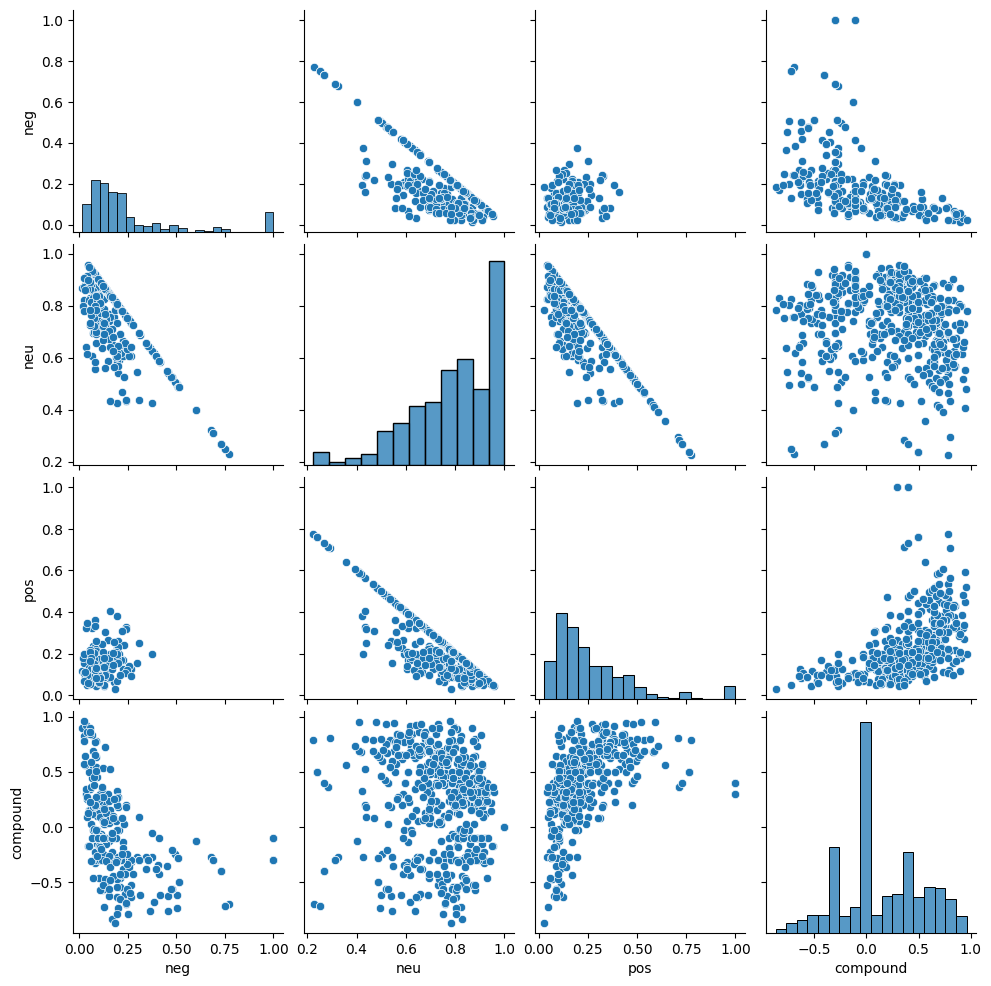

In [ ]:
# "Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters."
# for example, the relationships between pos as the x-value, with neg as the y-value, is shown in the second graph, which is a scatter plot.
# if plotted against itself, it will show a histogram instead. (look at the graphs from the top left to the bottom right)

def n(val):
    return [float("nan") if x == 0 else x for x in val]

data["neg"] = n(data["neg"])
data["neu"] = n(data["neu"])
data["pos"] = n(data["pos"])

sns.pairplot(data[["neg", "neu", "pos", "compound"]])

<Axes: xlabel='compound', ylabel='Count'>

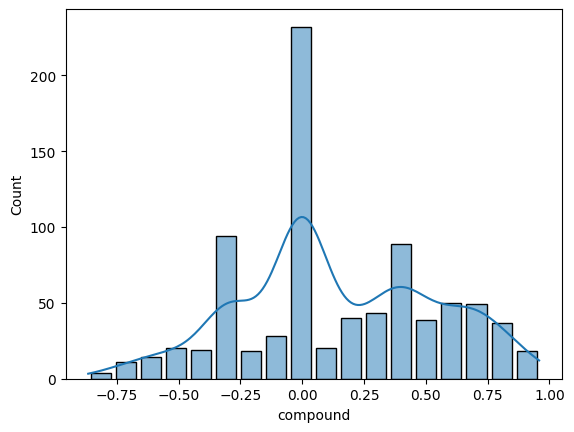

In [ ]:
# this histogram plot shows the frequency distribution of data points across a range of numerical values. this particular plot shows that 0 and values really close to it shows up the most often.
sns.histplot(data["compound"], kde=True, shrink=.8)

In [ ]:
data.describe()

,neg,neu,pos,compound
count,311.000000,789.000000,438.000000,825.000000
mean,0.248942,0.799823,0.266009,0.141596
std,0.252866,0.180369,0.200443,0.393160
min,0.016000,0.225000,0.030000,-0.865800
25%,0.095500,0.690000,0.127500,-0.077200
50%,0.157000,0.823000,0.205500,0.000000
75%,0.249000,1.000000,0.346000,0.421500
max,1.000000,1.000000,1.000000,0.958700


In [ ]:
data["label"].value_counts()

pos    400
neg    258
neu    167
Name: label, dtype: int64

In [ ]:
data["compound_score"].value_counts()

pos    392
neu    217
neg    216
Name: compound_score, dtype: int64

<Axes: xlabel='label', ylabel='count'>

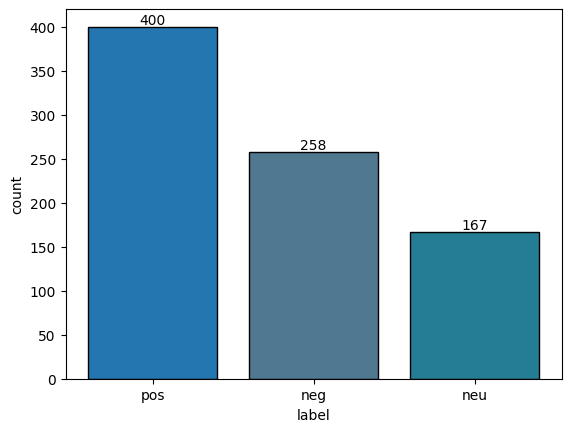

In [ ]:
# this shows the total count for each value in the "label" column.
ax1 = sns.countplot(x="label", data=data)
ax1.bar_label(ax1.containers[0])
sns.histplot(data["label"], bins=30, shrink=.8)

In [ ]:
# this shows the total count for each value in the "compound_score" column.
ax2 = sns.countplot(x="compound_score", data=data)
ax2.bar_label(ax2.containers[0])
sns.histplot(data["compound_score"], shrink=.8)

<Axes: xlabel='compound_score', ylabel='count'>